In [191]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

<AxesSubplot:>

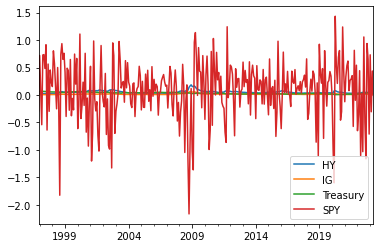

In [192]:
df_HY = pd.read_csv("SAA_data//HY.csv", index_col=0, parse_dates=True)
df_HY.columns = ['HY']
df_HY['HY'] = pd.to_numeric(df_HY['HY'], errors='coerce')
df_HY = df_HY.resample('M').mean() / 100

df_IG = pd.read_csv("SAA_data//IG.csv", index_col=0, parse_dates=True)
df_IG.columns = ['IG']
df_IG['IG'] = pd.to_numeric(df_IG['IG'], errors='coerce')
df_IG = df_IG.resample('M').mean() / 100

df_Treasury = pd.read_csv("SAA_data//Treasury.csv", index_col=0, parse_dates=True)
df_Treasury.columns = ['Treasury']
df_Treasury['Treasury'] = pd.to_numeric(df_Treasury['Treasury'], errors='coerce')
df_Treasury = df_Treasury.resample('M').mean() / 100

df_SPY = pd.read_csv("SAA_data//SPY.csv", index_col=0, parse_dates=True)[['Adj Close']]
df_SPY.columns = ['SPY']
df_SPY = df_SPY.resample("M").last().pct_change().dropna()
df_SPY = (1 + df_SPY) ** 12 - 1
df_SPY = df_SPY
df = pd.concat([df_HY, df_IG, df_Treasury, df_SPY], axis=1).dropna()

df = np.log(1 + df)
df.plot()

In [193]:
R_TS_1y = df.rolling(window=12).corr().dropna()
R_TS_3y = df.rolling(window=36).corr().dropna()
R_TS_10y = df.rolling(window=120).corr().dropna()

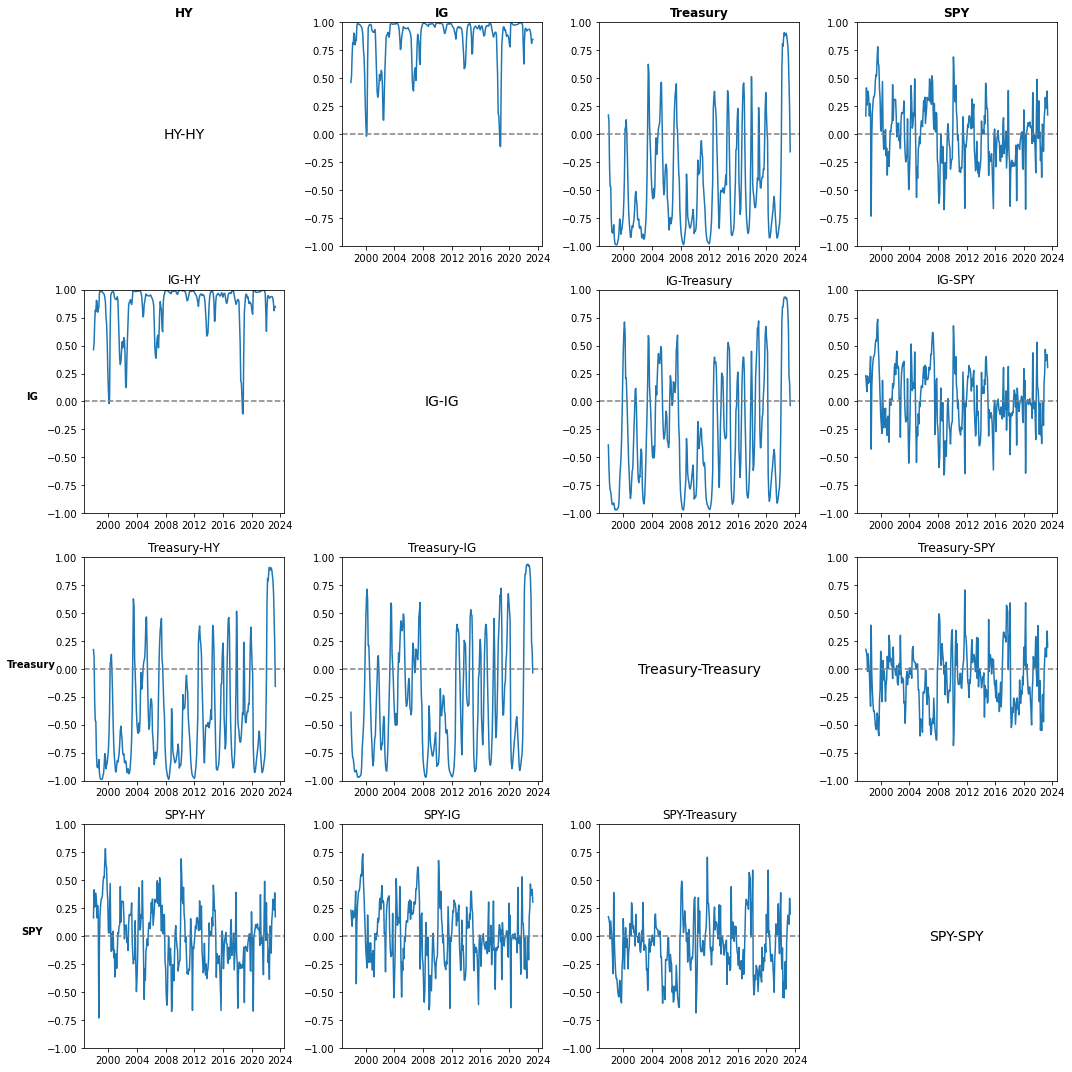

In [194]:
'''
Rolling Window 1Y
'''
# Get the column combinations
columns = df.columns

# Calculate the number of columns and rows for the plot grid
n = len(columns)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Create the plot grid
for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j:
            axes[i, j].text(0.5, 0.5, f"{row}-{col}", ha='center', va='center', fontsize=14)
            axes[i, j].set_axis_off()
        else:
            axes[i, j].plot(R_TS_1y.xs(key=(row), level=(1), axis=0)[[col]])
            axes[i, j].set_title(f"{row}-{col}")
            axes[i, j].set_ylim(-1, 1)
            axes[i, j].axhline(0, color='gray', linestyle='--')

# Set the x-axis and y-axis labels
for ax, col in zip(axes[0], columns):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:, 0], columns):
    ax.set_ylabel(row, rotation=0, fontweight='bold', labelpad=15)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
'''
Rolling Window 3Y
'''
# Get the column combinations
columns = df.columns

# Calculate the number of columns and rows for the plot grid
n = len(columns)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Create the plot grid
for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j:
            axes[i, j].text(0.5, 0.5, f"{row}-{col}", ha='center', va='center', fontsize=14)
            axes[i, j].set_axis_off()
        else:
            axes[i, j].plot(R_TS_3y.xs(key=(row), level=(1), axis=0)[[col]])
            axes[i, j].set_title(f"{row}-{col}")
            axes[i, j].set_ylim(-1, 1)
            axes[i, j].axhline(0, color='gray', linestyle='--')

# Set the x-axis and y-axis labels
for ax, col in zip(axes[0], columns):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:, 0], columns):
    ax.set_ylabel(row, rotation=0, fontweight='bold', labelpad=15)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()